In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [10]:
dTree = DecisionTreeClassifier(criterion="gini")

In [11]:
dTree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [12]:
dTree.score(X_test, Y_test)

0.9

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
df = load_breast_cancer()

In [23]:
column_names = list(df.feature_names) + ["target"]

In [24]:
df = pd.DataFrame(np.c_[df.data, df.target], columns=column_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [27]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [25]:
criterions = ["gini", "entropy", "log_loss"]

In [28]:
outputs = {
    "criterion": criterions,
    "score": list([])
}
for c in criterions:
  dTree = DecisionTreeClassifier(criterion=c)
  dTree.fit(X_train, Y_train)
  outputs["score"].append(dTree.score(X_test, Y_test))

In [31]:
outputs.keys()

dict_keys(['criterion', 'score'])

In [33]:
outputsDf = pd.DataFrame(outputs, columns=outputs.keys())
outputsDf

,criterion,score
0,gini,0.947368
1,entropy,0.903509
2,log_loss,0.929825


In [34]:
from sklearn.svm import SVC

In [39]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

In [40]:
outputs = {
    "kernel": kernels,
    "score": list([])
}
for k in kernels:
  svm = SVC(kernel=k)
  svm.fit(X_train, Y_train)
  outputs["score"].append(svm.score(X_test, Y_test))

In [41]:
outputsDfSvm = pd.DataFrame(outputs, columns=outputs.keys())
outputsDfSvm

,kernel,score
0,linear,0.982456
1,poly,0.947368
2,rbf,0.956140
3,sigmoid,0.403509


In [42]:
import matplotlib.pyplot as plt

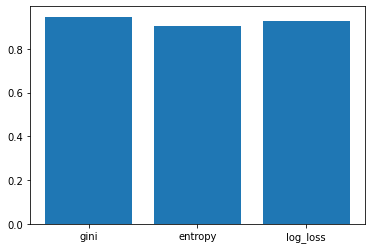

In [51]:
plt.bar(outputsDf["criterion"], outputsDf["score"])
plt.show()

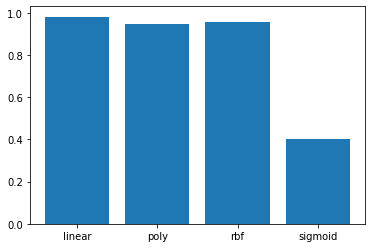

In [52]:
plt.bar(outputsDfSvm["kernel"], outputsDfSvm["score"])
plt.show()